In [68]:
import pandas as pd
import numpy as np, gc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

In [118]:
%pwd

'/Users/sbentovim'

In [69]:
#read in the cvs file making the transactionIDs the row labels rather than just another variable (so can be merged)

train_identity = pd.read_csv('/Users/sbentovim/Documents/Uni/2nd Year/ID/Project 2/ieee-fraud-detection/train_identity.csv', index_col='TransactionID')
train_transaction = pd.read_csv('/Users/sbentovim/Documents/Uni/2nd Year/ID/Project 2/ieee-fraud-detection/train_transaction.csv', index_col='TransactionID')
test_identity = pd.read_csv('/Users/sbentovim/Documents/Uni/2nd Year/ID/Project 2/ieee-fraud-detection/test_identity.csv', index_col='TransactionID')
test_transaction = pd.read_csv('/Users/sbentovim/Documents/Uni/2nd Year/ID/Project 2/ieee-fraud-detection/test_transaction.csv', index_col='TransactionID')




In [70]:
train_transaction.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
train_identity.head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [72]:
train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)

In [73]:
train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [74]:
#ensure all columns are named the same 

test = test.rename(columns = {'id-01' : 'id_01', 'id-02' : 'id_02', 
                         'id-03' : 'id_03', 'id-04' : 'id_04', 
                         'id-05' : 'id_05', 'id-06' : 'id_06', 
                         'id-07' : 'id_07', 'id-08' : 'id_08', 
                         'id-09' : 'id_09', 'id-10' : 'id_10',
                         'id-11' : 'id_11', 'id-12' : 'id_12', 
                         'id-13' : 'id_13', 'id-14' : 'id_14', 
                         'id-15' : 'id_15', 'id-16' : 'id_16', 
                         'id-17' : 'id_17', 'id-18' : 'id_18', 
                         'id-19' : 'id_19', 'id-20' : 'id_20', 
                         'id-21' : 'id_21', 'id-22' : 'id_22', 
                         'id-23' : 'id_23', 'id-24' : 'id_24', 
                         'id-25' : 'id_25', 'id-26' : 'id_26', 
                         'id-27' : 'id_27', 'id-28' : 'id_28', 
                         'id-29' : 'id_29', 'id-30' : 'id_30', 
                         'id-31' : 'id_31', 'id-32' : 'id_32', 
                         'id-33' : 'id_33', 'id-34' : 'id_34', 
                         'id-35' : 'id_35', 'id-36' : 'id_36', 
                         'id-37' : 'id_37', 'id-38' : 'id_38'})

In [75]:
# create an hour variable from datetime stamp
def hour_feat(f):
    #encode as 0-23
    hours = f / (3600)        
    encoded_hours = np.floor(hours) % 24
    return encoded_hours

train['hour'] = hour_feat(train['TransactionDT'])
test['hour'] = hour_feat(test['TransactionDT'])

In [76]:
# sort covariates in to categorical and numeric
cat_cols = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
               'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1',
               'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo',
               'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20',
               'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
               'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']

exclude = ['TransactionID', 'TransactionDT', 'isFraud']
num_cols = [c for c in train.columns if (c not in cat_cols) & (c not in exclude)]


In [77]:
# drop more than 90% nas 

col_na = train.isna().sum()
drop_na = col_na[(col_na/ train.shape[0]) > 0.9].index

use_cols = [c for c in train.columns if c not in drop_na]
cat_cols = [c for c in cat_cols if c not in drop_na]
num_cols = [c for c in num_cols if c not in drop_na]

train[cat_cols] = train[cat_cols].astype(str)
train[num_cols] = train[num_cols].astype(np.float)
train = train[use_cols]


# Determine Which V columns are Linked

We determine which columns are related by the number of NANs present. We see that D1 relates to a subset of V281 thru V315, and D11 relates to V1 thru V11. Also we find groups of Vs with similar NAN structure. And we see that M1, M2, M3 related and M8, M9 related.

In [78]:

cols_t = ['TransactionID', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9']
cols_v = ['V'+str(x) for x in range(1,340)]; types_v = {}


In [79]:
# search number of nas accross all vs and group together those columns with the exact same number of nas

nans = train.isna()
na_groups = {}
i_cols = ['V'+str(i) for i in range(1,340)]
for col in train.columns:
    group_x = nans[col].sum()
    try:
        na_groups[group_x].append(col)
    except:
        na_groups[group_x] = [col]
del nans; x = gc.collect()

for n,v in nans_groups.items():
    print('number of NA =', n)
    print(v)

number of NA = 0
['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'hour']
number of NA = 352271
['dist1']
number of NA = 1269
['D1', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315']
number of NA = 280797
['D2']
number of NA = 262878
['D3']
number of NA = 168922
['D4']
number of NA = 309841
['D5']
number of NA = 517353
['D6']
number of NA = 515614
['D8', 'D9', 'id_09', 'id_10']
number of NA = 76022
['D10']
number of NA = 279287
['D11', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V

We now look at V1 - V11 along with D11 as these are clearly linked with the exact same number of Nas. We want to decide which of these variables to keep, therefore we look at the proportion of Nas in each variable along with their correlations

# V1 - V11, D11

In [85]:
vc = ['dayr','isFraud','TransactionAmt','card1','addr1','D1n','D11n']
vs = na_groups[279287]
v_title = 'V1 - V11, D11'

We want to see which Vs are highly correlated with each other within th groups of Vs that have the same number of NAs. From this we can choose some Vs to get rid of. 

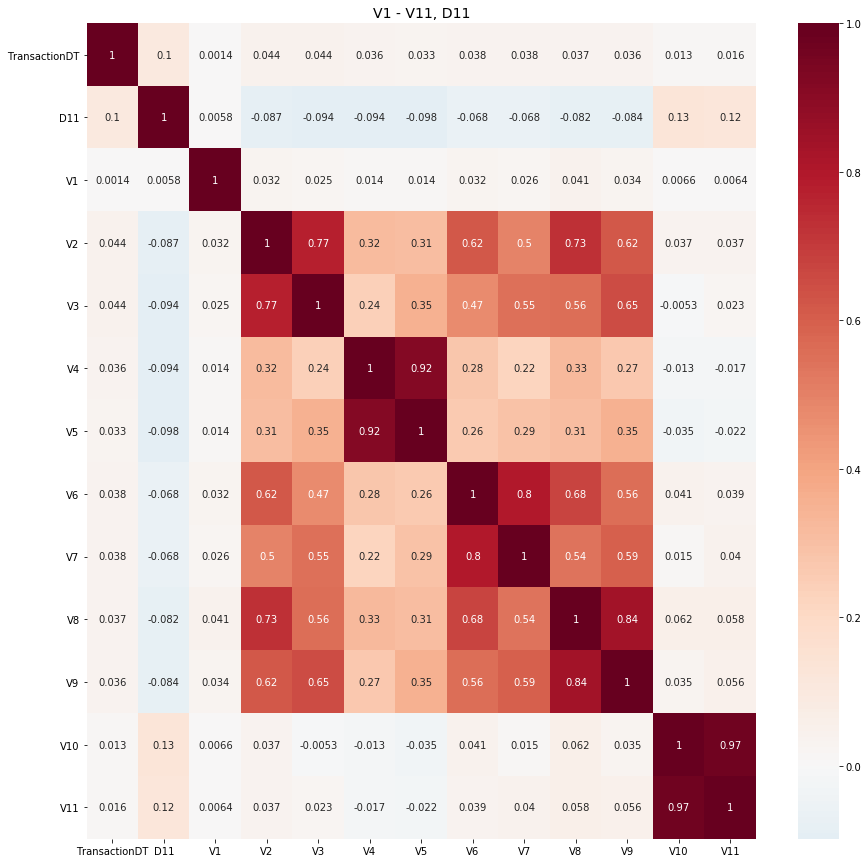

In [86]:
def v_correlation(vs, v_title = ''):
    cols = ['TransactionDT'] + vs
    plt.figure(figsize = (15, 15))
    sns.heatmap(train[cols].corr(), cmap = 'RdBu_r', annot = True, center = 0.0)
    if v_title !='': plt.title(v_title, fontsize = 14)
    else: plt.title(vs[0]+' - '+ vs[-1], fontsize = 14)
    plt.show()
    
v_correlation(vs,v_title)

In [87]:
groups = [[1],[2,3],[4,5],[6,7],[8,9],[10,11]]

def choose_v(groups, c='V'):
    use = []
    for g in groups:
        mx = 0; vx = g[0]
        for gg in g:
            n = train[c+str(gg)].nunique()
            if n > mx:
                mx = n
                vx = gg
        use.append(vx)
    print('Use these',use)
choose_v(groups)

Use these [1, 3, 4, 6, 8, 11]


Repeat this process for every group of linked vs. 

# V12 - V34

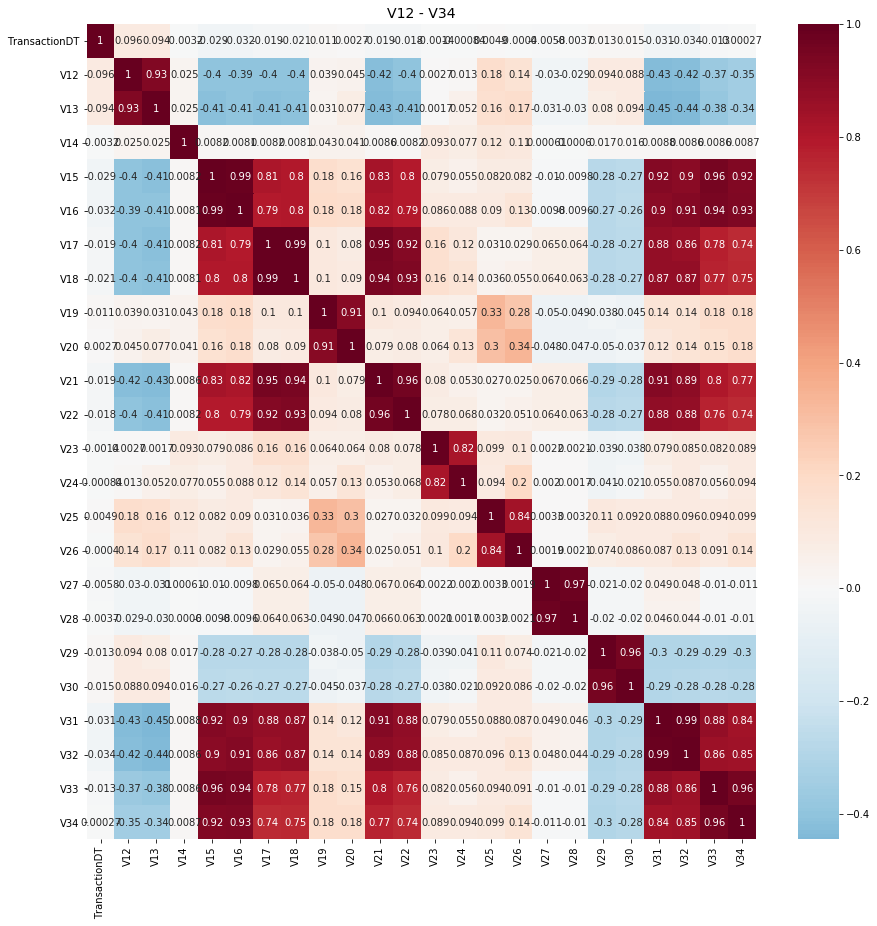

In [88]:
vs = na_groups[76073]
v_correlation(vs)

In [89]:
groups = [[12,13],[14],[15,16,17,18,21,22,31,32,33,34],[19,20],[23,24],[25,26],[27,28],[29,30]]
choose_v(groups)

Use these [13, 14, 17, 20, 23, 26, 27, 30]


# V35 - V52

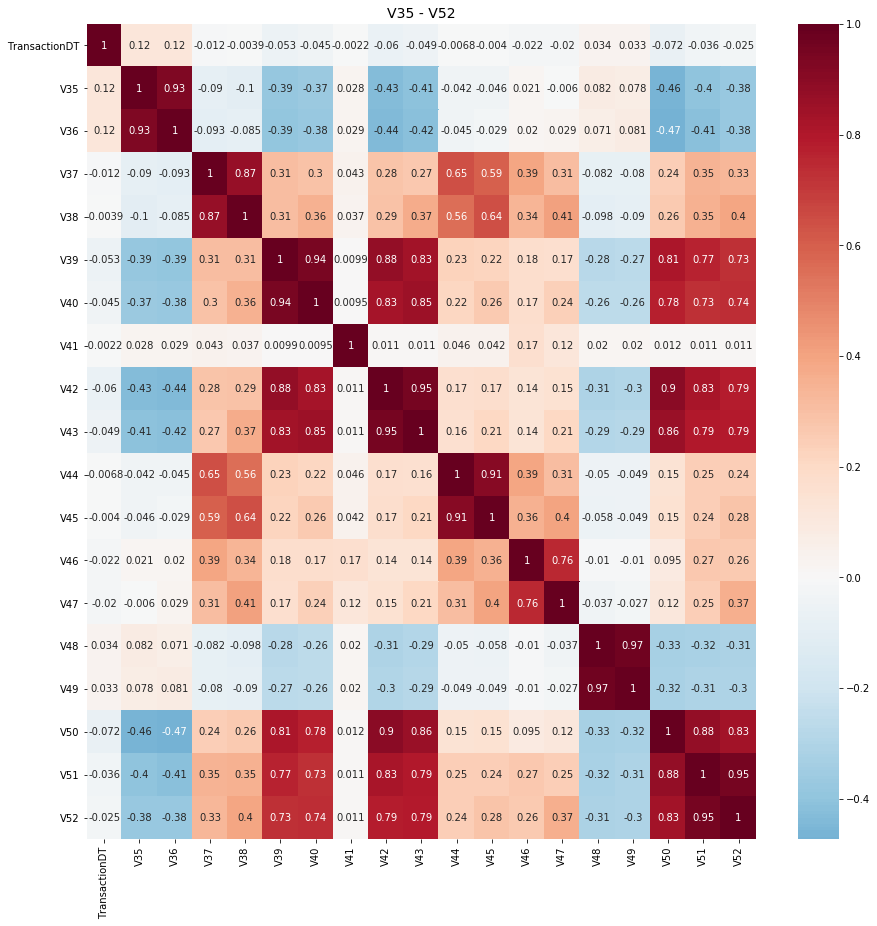

In [90]:
vs = na_groups[168969]
v_correlation(vs)

In [91]:
groups = [[35,36],[37,38],[39,40,42,43,50,51,52],[41],[44,45],[46,47],[48,49]]
choose_v(groups)

Use these [36, 37, 40, 41, 44, 47, 48]


# V53 - V74

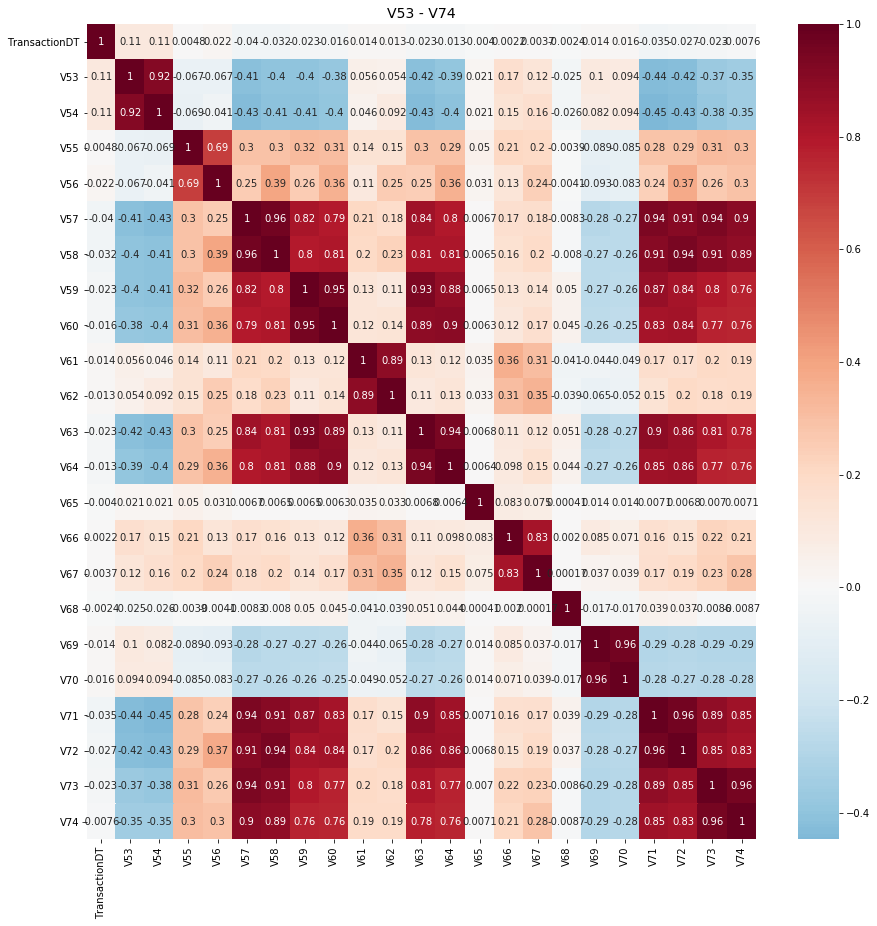

In [92]:
vs = na_groups[77096]
v_correlation(vs)

In [93]:
groups = [[53,54],[55,56],[57,58,59,60,63,64,71,72,73,74],[61,62],[65],[66,67],[68],[69,70]]
choose_v(groups)

Use these [54, 56, 59, 62, 65, 67, 68, 70]


# V75 - V94

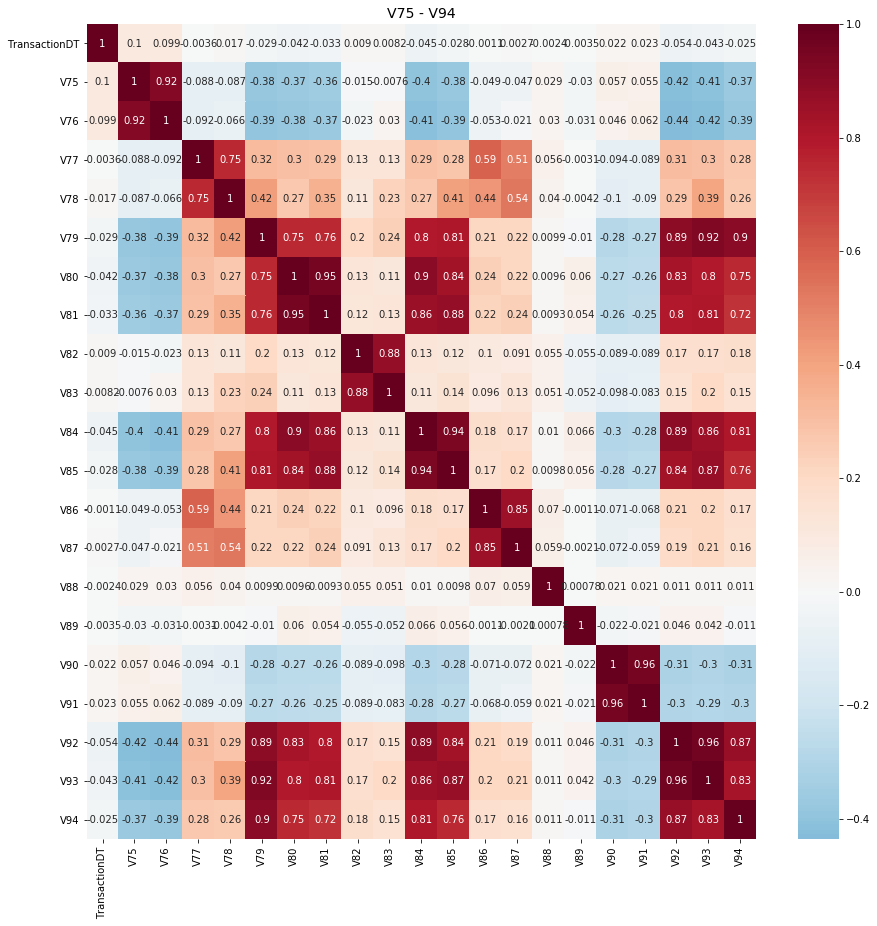

In [94]:
vs = na_groups[89164]
v_correlation(vs)

In [95]:
groups = [[75,76],[77,78],[79,80,81,84,85,92,93,94],[82,83],[86,87],[88],[89],[90,91]]
choose_v(groups)

Use these [76, 78, 80, 82, 86, 88, 89, 91]


# V95 - V137

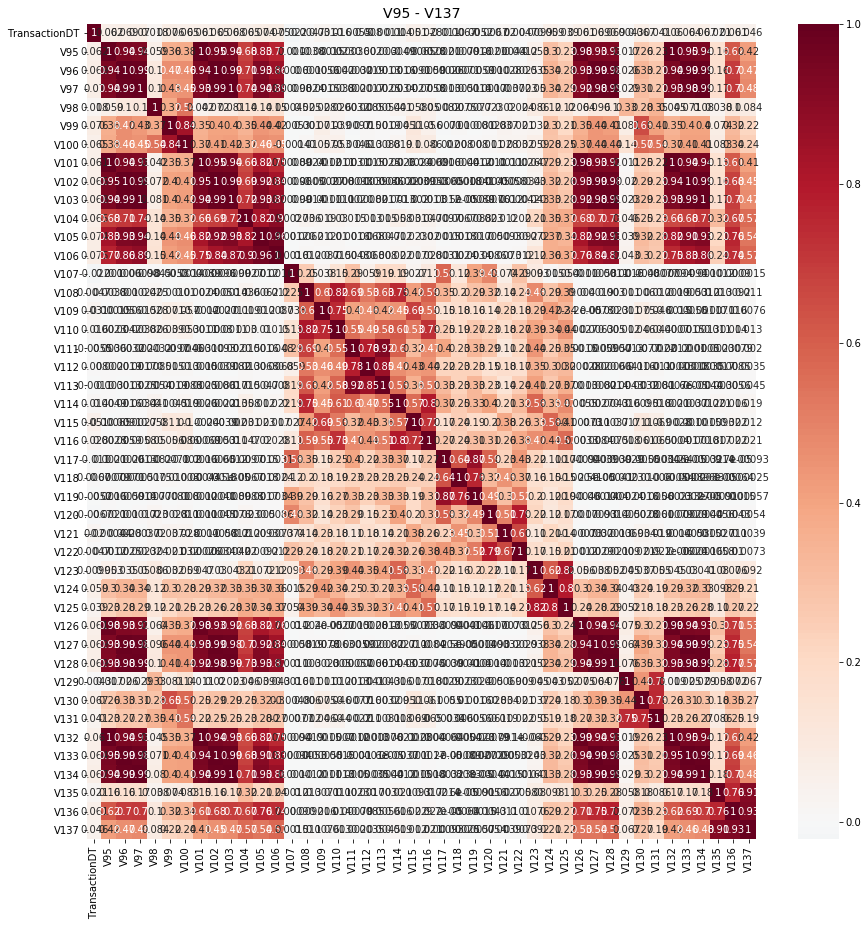

In [96]:
vs = na_groups[314]
v_correlation(vs)

In [97]:
Break down this correlation table into smaller parts to see more closely. 

SyntaxError: invalid syntax (<ipython-input-97-2e131bcd2c92>, line 1)

In [ ]:
vs = ['V'+str(x) for x in range(95,107)]
v_correlation(Vs)

In [ ]:
groups = [[95,96,97,101,102,103,105,106],[98],[99,100],[104]]
choose_v(groups)

In [ ]:
vs = ['V'+str(x) for x in range(107,124)]
v_correlation(vs)

In [ ]:
groups = [[107],[108,109,110,114],[111,112,113],[115,116],[117,118,119],[120,122],[121],[123]]
choose_v(grps)

In [ ]:
vs = ['V'+str(x) for x in range(124,138)]
v_correlation(vs)

In [ ]:
groups = [[124,125],[126,127,128,132,133,134],[129],[130,131],[135,136,137]]
choose_v(groups)

# V138 - V163

In [ ]:
vs = na_groups[508595]
v_correlation(vs)

In [ ]:
groups = [[138],[139,140],[141,142],[146,147],[148,149,153,154,156,157,158],[161,162,163]]
choose_v(groups)

# V143 - V166

In [ ]:
vs = na_groups[508589]
v_correlation(vs)

In [ ]:
groups = [[143,164,165],[144,145,150,151,152,159,160],[166]]
choose_v(groups)

# V167 - V216

In [ ]:
vs = [x for x in na_groups[450909]]
v_correlation(vs)

In [ ]:
vs = [x for x in na_groups[450909] if int(x[1:]) < 186]
v_correlation(vs)

In [ ]:
groups = [[167,168,177,178,179],[172,176],[173],[181,182,183]]
choose_v(groups)

In [ ]:
vs = [x for x in na_groups[450909] if (int(x[1:]) > 183)]
v_correlation(vs)

In [ ]:
groups = [[186,187,190,191,192,193,196,199],[202,203,204,211,212,213],[205,206],[207],[214,215,216]]
choose_v(groups)

# V169 - V210

In [ ]:
vs = na_groups[450721]
v_correlation(vs)

In [ ]:
groups = [[169],[170,171,200,201],[174,175],[180],[184,185],[188,189],[194,195,197,198],[208,210],[209]]
choose_v(groups)

# V217 - V278

In [ ]:
vs = [x for x in na_groups[460110]]
v_correlation(vs)

In [ ]:
vs = [x for x in na_groups[460110] if int(x[1:]) < 240]
v_correlation(vs)

In [ ]:
groups = [[217,218,219,231,232,233,236,237],[223],[224,225],[226],[228],[229,230],[235]]
choose_v(groups)

In [ ]:
vs = [x for x in nans_groups[460110] if (int(x[1:]) > 237) & (int(x[1:]) < 263)]
v_correlation(vs)

In [ ]:
groups = [[240,241],[242,243,244,258],[246,257],[247,248,249,253,254],[252],[260],[261,262]]
choose_v(groups)

In [ ]:
vs = [x for x in na_groups[460110] if (int(x[1:]) > 262)]
v_correlation(vs)

In [ ]:
groups = [[263,265,264],[266,269],[267,268],[273,274,275],[276,277,278]]
choose_v(groups)

# V220 - V272

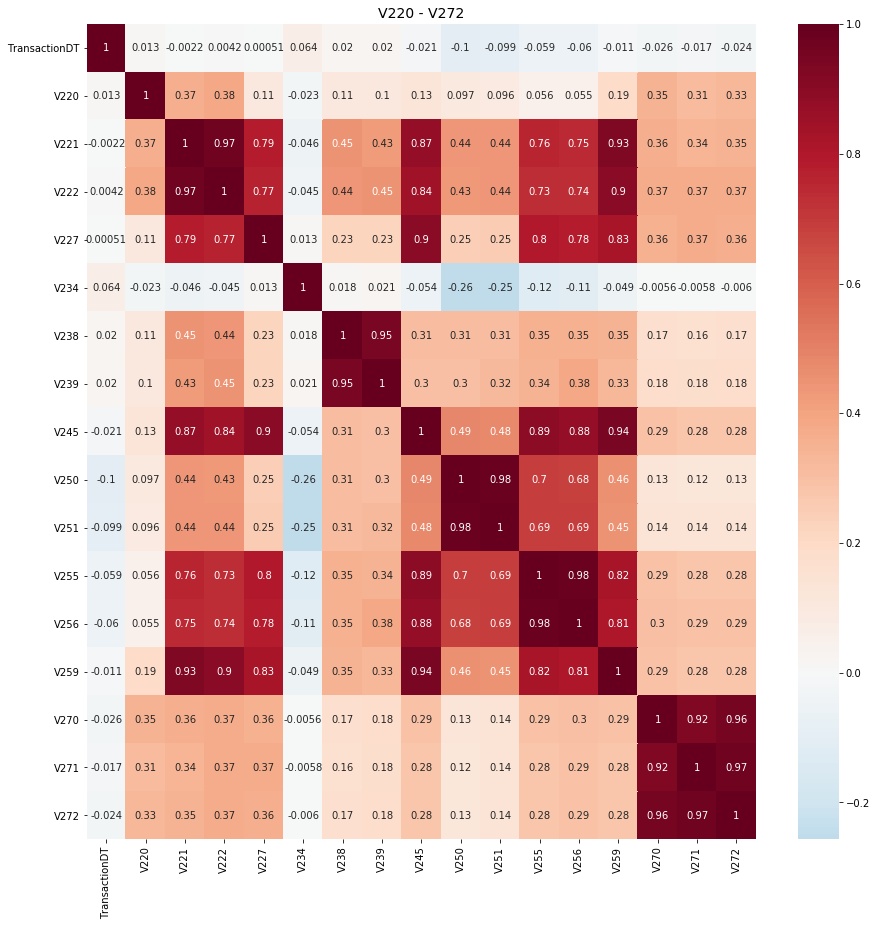

In [98]:
vs = na_groups[449124]
v_correlation(vs)

In [99]:
groups = [[220],[221,222,227,245,255,256,259],[234],[238,239],[250,251],[270,271,272]]
choose_v(groups)

Use these [220, 221, 234, 238, 250, 271]


# V279 - V321

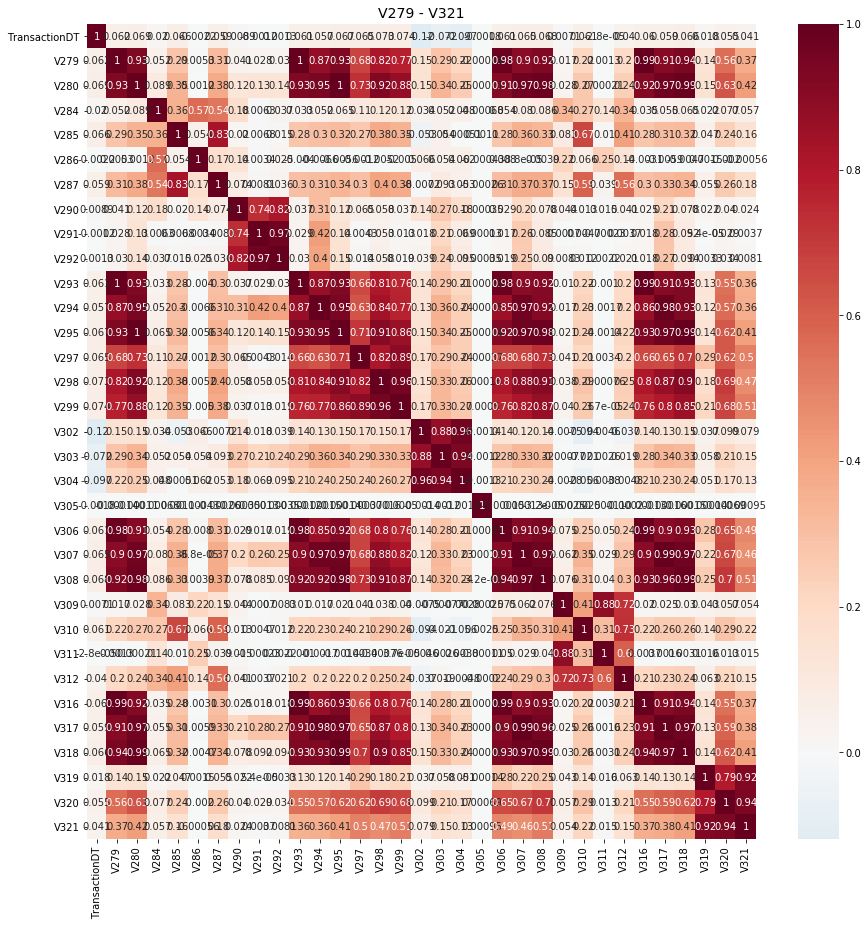

In [100]:
vs = [x for x in na_groups[12]]
v_correlation(vs)

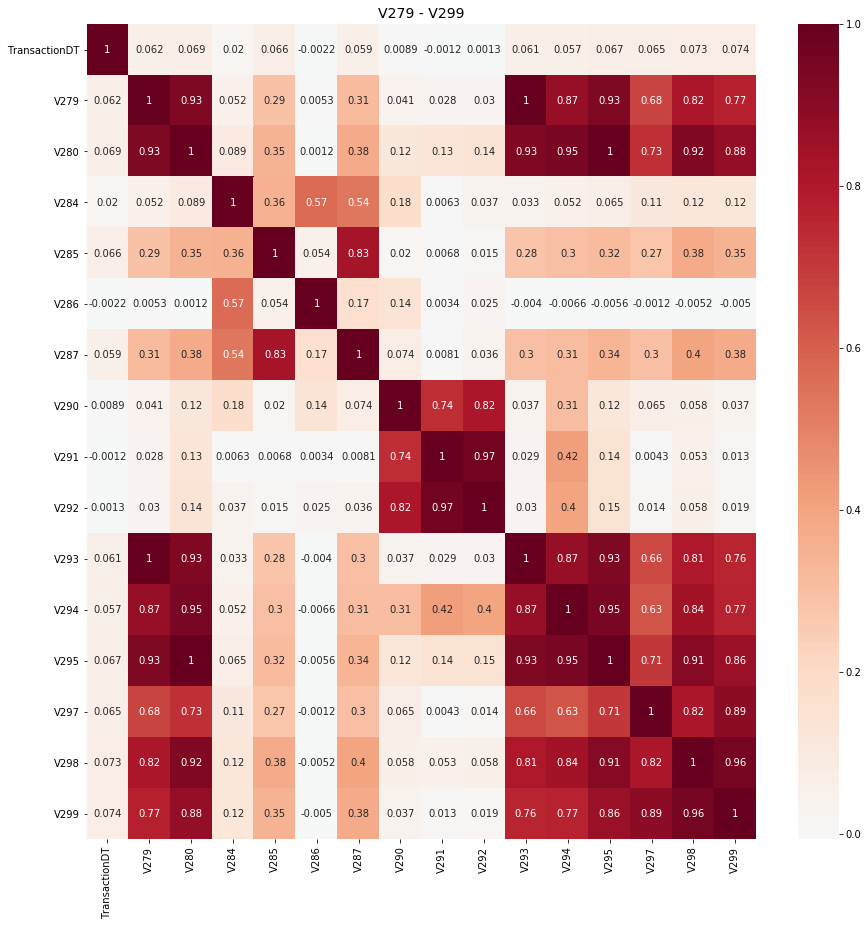

In [101]:
vs = [x for x in na_groups[12] if int(x[1:]) < 302]
v_correlation(vs)

In [102]:
groups = [[279,280,293,294,295,298,299],[284],[285,287],[286],[290,291,292],[297]]
choose_v(groups)

Use these [294, 284, 285, 286, 291, 297]


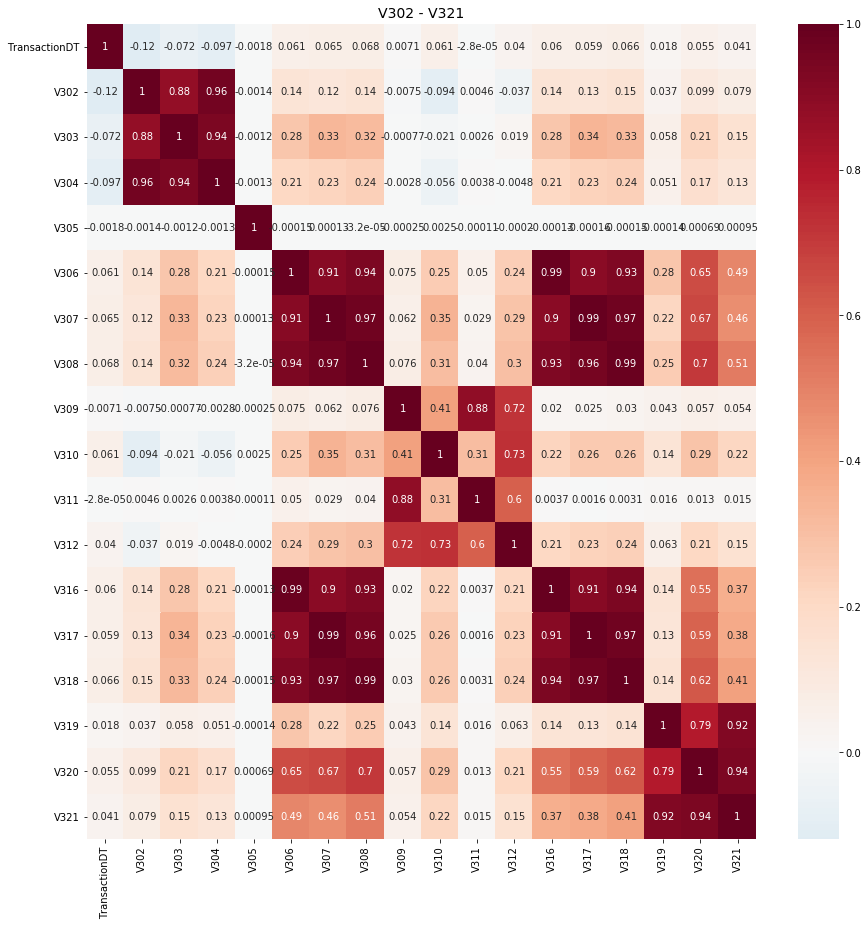

In [103]:
vs = [x for x in nans_groups[12] if int(x[1:]) > 299]
v_correlation(vs)

In [104]:
groups = [[302,303,304],[305],[306,307,308,316,317,318],[309,311],[310,312],[319,320,321]]
choose_v(groups)

Use these [303, 305, 307, 309, 310, 320]


# V281 - V315, D1

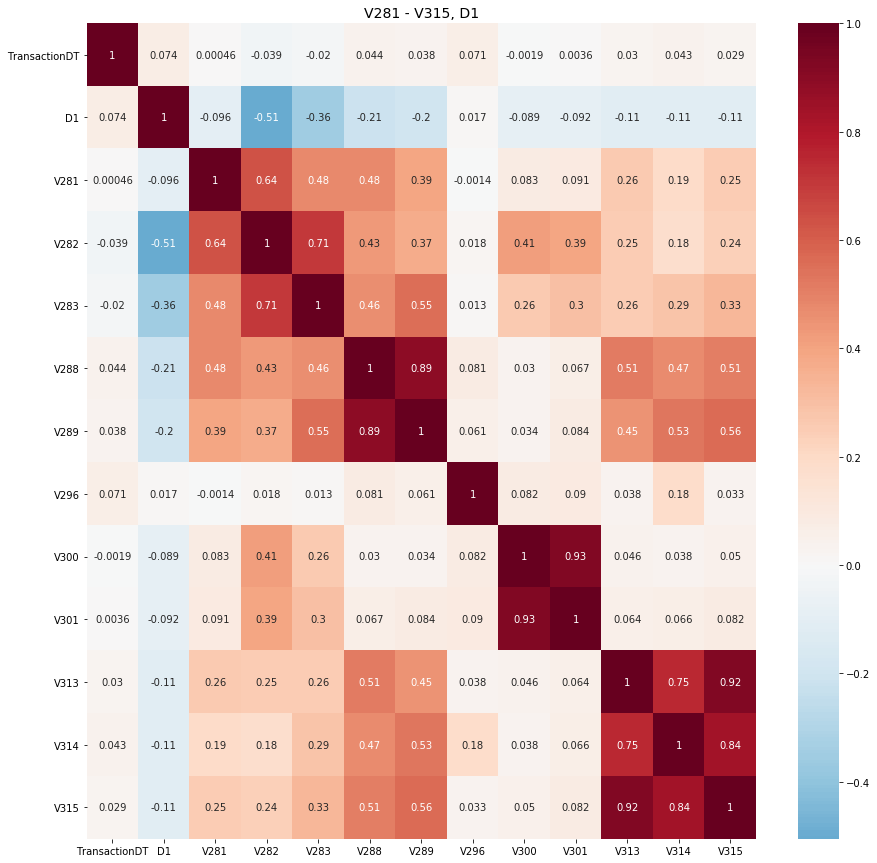

In [105]:
vs = na_groups[1269]
v_title = 'V281 - V315, D1'
v_correlation(vs, v_title)

In [106]:
groups = [[281],[282,283],[288,289],[296],[300,301],[313,314,315]]
choose_v(groups)

Use these [281, 283, 289, 296, 301, 314]


# V322 - V339

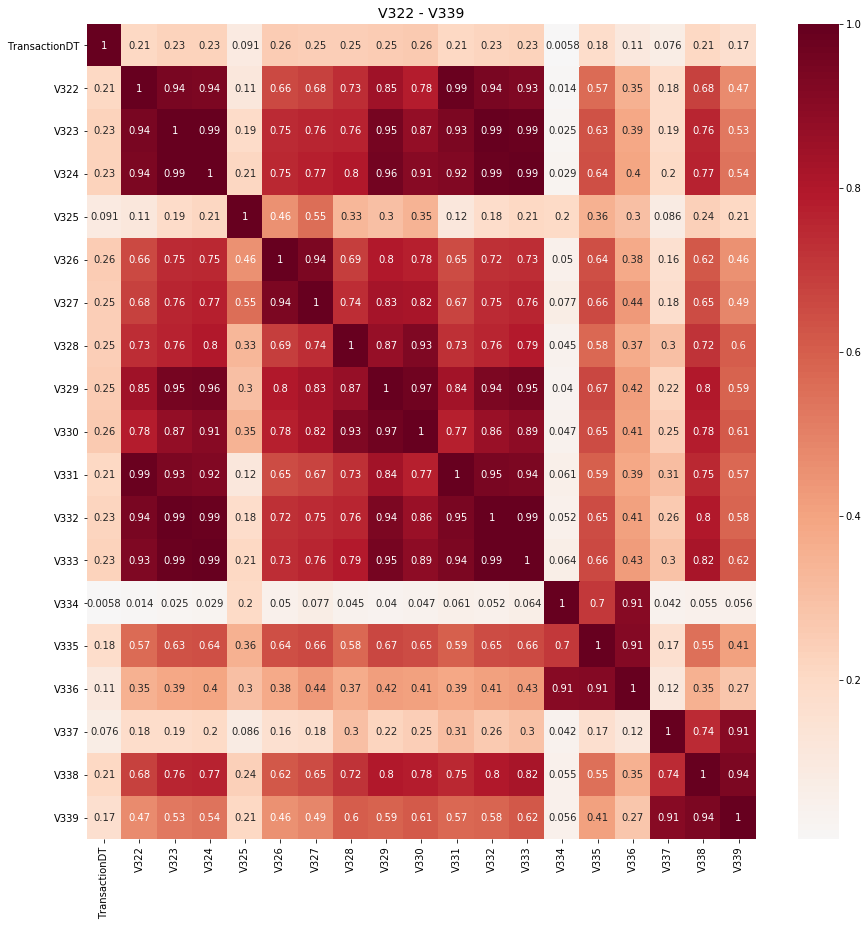

In [107]:
vs = na_groups[508189]
v_correlation(vs)

In [108]:
groups = [[322,323,324,326,327,328,329,330,331,332,333],[325],[334,335,336],[337,338,339]]
choose_v(groups)

Use these [332, 325, 335, 338]


So the V columns that we want to use are:

In [109]:
v =  [1, 3, 4, 6, 8, 11]
v += [13, 14, 17, 20, 23, 26, 27, 30]
v += [36, 37, 40, 41, 44, 47, 48]
v += [54, 56, 59, 62, 65, 67, 68, 70]
v += [76, 78, 80, 82, 86, 88, 89, 91]
v += [96, 98, 99, 104]
v += [107, 108, 111, 115, 117, 120, 121, 123]
v += [124, 127, 129, 130, 136]
v += [138, 139, 142, 147, 156, 162]
v += [165, 160, 166]
v += [178, 176, 173, 182]
v += [187, 203, 205, 207, 215]
v += [169, 171, 175, 180, 185, 188, 198, 210, 209]
v += [218, 223, 224, 226, 228, 229, 235]
v += [240, 258, 257, 253, 252, 260, 261]
v += [264, 266, 267, 274, 277]
v += [220, 221, 234, 238, 250, 271]
v += [294, 284, 285, 286, 291, 297]
v += [303, 305, 307, 309, 310, 320]
v += [281, 283, 289, 296, 301, 314]
v += [332, 325, 335, 338]

In [115]:
#drop unwanted v columns
v_chosen = ['V'+ str(x) for x in v]
drop_cols = [c for c in cols_v if c not in v_chosen]
use_cols = [c for c in train.columns if c not in drop_cols]
train = train[use_cols]


# Impute Values

In [116]:
# fill numeric NAs with median
num_cols = [c for c in train.columns if (c not in cat_cols) & (c not in exclude)]

median_train = train[num_cols].median() 
median_test = test[num_cols].median()
train[num_cols] = train[num_cols].fillna(median_train)
test[num_cols] = test[num_cols].fillna(median_test)

# fill categorical NAs with "missing"
train[cat_cols] = train[cat_cols].replace("nan", "missing")

In [32]:
#remove unnecessary columns
train = train.drop(columns=['TransactionDT'])
test = test.drop(columns=['TransactionDT'])


In [35]:
#split train and validation datasets
response = 'isFraud'
num_cols = train.select_dtypes(include = np.number).columns
cat_cols = train.select_dtypes(exclude = np.number).columns

num_cols = [c for c in num_cols if c != response]

train_x, val_x, train_y, val_y = train_test_split(train[num_cols+list(cat_cols)], 
                                    train['isFraud'], test_size=0.2)